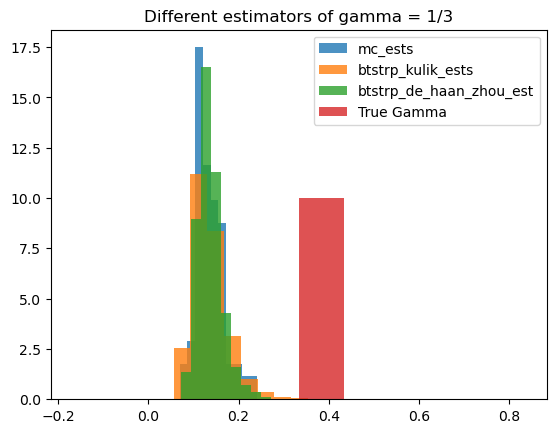

In [7]:
# We compute the histogram of mc and bootstrap

import matplotlib.pyplot as plt
from extreme_utils import *
from kulik_soulier_utils import *

inv_gamma = 3
mc_steps = 100
btstrp_steps = 100
sample_size = 2000

method_kulik = {"method_name": "kulik_block_size_5",
             "method": "get_bootstrap_variance_est_kulik",
             "size_sample_bootstrap_ratio": 0.8,
             "weight_distribution": "poisson",
             "kulik_downsampling_procedure": "none",
             "dwnsmplng_choices": "global, per_block, none",
             "block_size": 10
            }

mc_ests = list()
btstrp_kulik_ests = list()
btstrp_de_haan_zhou_est = list()
for i in range(mc_steps):
    sample_ma = get_ma_sample(inv_gamma,sample_size,10,distrib="frechet")
    mc_est = gamma_moment_1_estimator(int(0.1*sample_size), sample_ma)
    mc_ests.append(mc_est)
    for j in range(btstrp_steps):
        std, est_kulik = get_bootstrap_variance_est_kulik(method_kulik, sample_ma,
                                 1,
                                 bootstrap_size=0.8*sample_size,
                                 k0_opti=int(0.1*sample_size))
        btstrp_kulik_ests.append(est_kulik)
        # bootstrap normal
        bootstrapped_sample = choices(sample_ma, k=int(0.8*sample_size))
        gamma_moment_1_btstrap = gamma_moment_1_estimator(int(0.1*sample_size), bootstrapped_sample)
        btstrp_de_haan_zhou_est.append(gamma_moment_1_btstrap)

plt.hist(mc_ests, alpha=0.8, label="mc_ests",density = True)
plt.hist(btstrp_kulik_ests, alpha=0.8, label="btstrp_kulik_ests", density = True)
plt.hist(btstrp_de_haan_zhou_est, alpha=0.8, label="btstrp_de_haan_zhou_est", density = True)
plt.hist([1/inv_gamma],alpha=0.8,density=True,label="True Gamma")
plt.title("Different estimators of gamma = 1/3")
plt.legend()

Text(0.5, 1.0, 'Block Maxima: ma(20), window_size 1')

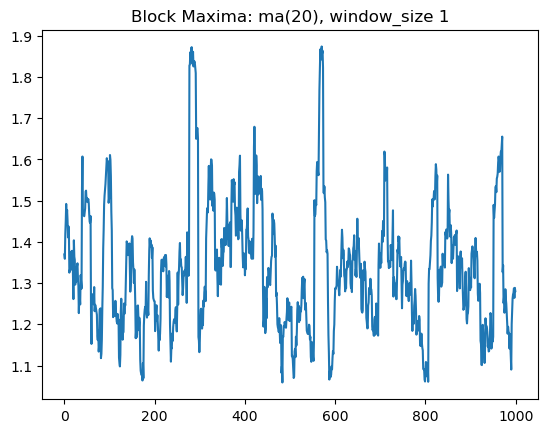

In [30]:
from extreme_utils import *
import matplotlib.pyplot as plt

size = 1000
sample_block_max = get_block_max(3,size,1,20)
plt.plot(sample_block_max)
plt.title("Block Maxima: ma(20), window_size 1")


Text(0.5, 1.0, 'Block Maxima: ma(20), window_size 2')

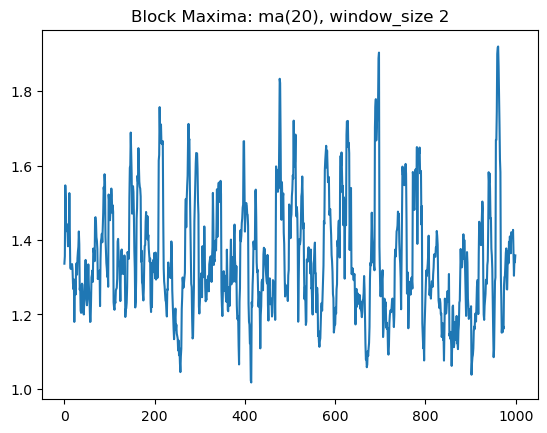

In [31]:
sample_block_max = get_block_max(3,size,2,20)
plt.plot(sample_block_max)
plt.title("Block Maxima: ma(20), window_size 2")


Text(0.5, 1.0, 'Block Maxima: ma(20), window_size 5')

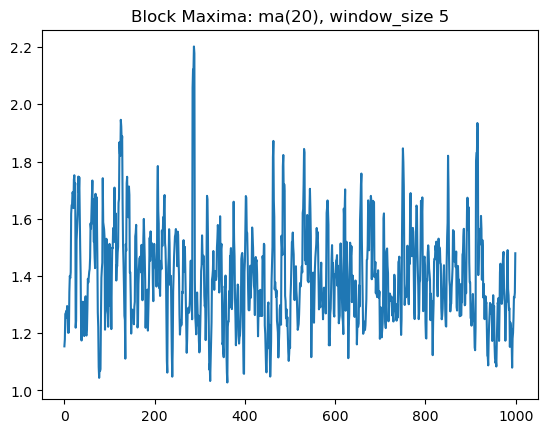

In [32]:
sample_block_max = get_block_max(3,size,5,20)
plt.plot(sample_block_max)
plt.title("Block Maxima: ma(20), window_size 5")


Text(0.5, 1.0, 'Block Maxima: ma(20), window_size 20')

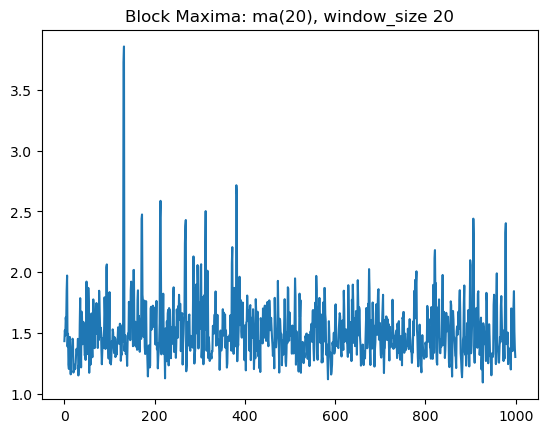

In [37]:
sample_block_max = get_block_max(3,size,20,20)
plt.plot(sample_block_max)
plt.title("Block Maxima: ma(20), window_size 20")


Text(0.5, 1.0, 'Block Maxima: ma(20), window_size 40')

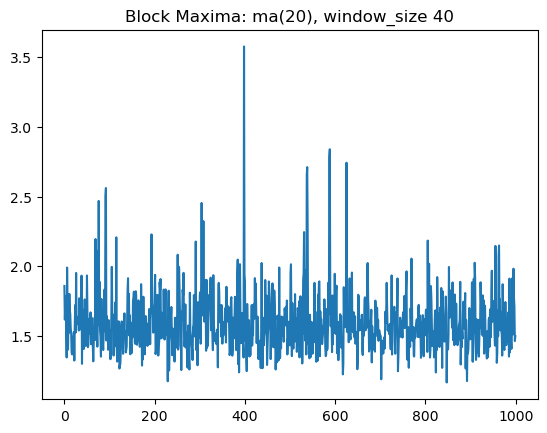

In [38]:
sample_block_max = get_block_max(3,size,40,20)
plt.plot(sample_block_max)
plt.title("Block Maxima: ma(20), window_size 40")


In [8]:
len(sample_block_max)

2000